In [1]:
import f3dasm

In [2]:
dim = 20
i = 50
r = 5
hyperparameters={}

design = f3dasm.make_nd_continuous_design(bounds=[-1.0, 1.0], dimensions=dim)

func = f3dasm.functions.Sphere(dimensionality=dim, noise=False, scale_bounds=[-1.0, 1.0])
data = f3dasm.Data(designspace=design)
optimizer = f3dasm.optimization.SGD(data=data, hyperparameters=hyperparameters)
sampler = f3dasm.sampling.LatinHypercubeSampling(doe=design)


all_data = f3dasm.run_multiple_realizations(optimizer=optimizer, 
function=func,
sampler=sampler,
iterations=i,
realizations=r
)


In [3]:
if dim == 2:
    func.plot_data(all_data[1], domain=[-1.,1.], px=100)

In [4]:
import pandas as pd
mean_y = pd.concat([d.get_output_data() for d in all_data], axis=1).mean(axis=1)

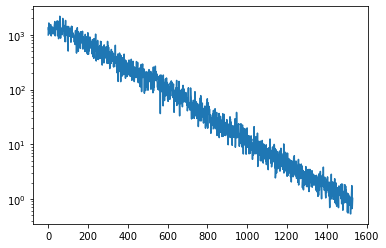

In [5]:
import matplotlib.pyplot as plt
plt.plot(mean_y)
plt.yscale('log')

In [6]:
t = None
t.keys()

AttributeError: 'NoneType' object has no attribute 'keys'